<a href="https://colab.research.google.com/github/msudhanshu10/Complete-Data-Science/blob/master/Feature_Engineering_Random_Sample_Imputation%2C_End_of_Distribution%2C_New_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Random Sample Imputation:

Aim:- It consists of taking random observations form the data set and we use this sample to replace nan values.



When it should be used?

It assumes that data is MCAR.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving train.csv to train.csv


In [ ]:
df= pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [ ]:
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
df.isna().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
median=df.Age.median()
median


28.0

In [ ]:
random_smaple=df['Age'].dropna().sample(df['Age'].isna().sum(), random_state=101)
random_smaple.index

Int64Index([853, 540, 259, 690, 469, 870,  57, 707, 448, 293,
            ...
            516,  81, 139, 414,   9, 385, 769, 341, 645,  75],
           dtype='int64', length=177)

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
def impute_nan(df, feature, median):
  df[feature+'_median']= df[feature].fillna(median)
  df[feature+'_random']=df[feature]
  # to create a random smaple
  random_sample=df[feature].dropna().sample(df[feature].isna().sum(), random_state=101)
  # to match the same index as in sample
  random_sample.index= df[df[feature].isnull()].index
  # replace nan values with the random sample.
  df.loc[df[feature].isna(), feature+'_random']= random_sample

In [ ]:
impute_nan(df, 'Age', median)

In [ ]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [ ]:
impute_nan(df, 'Age', median)

In [ ]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

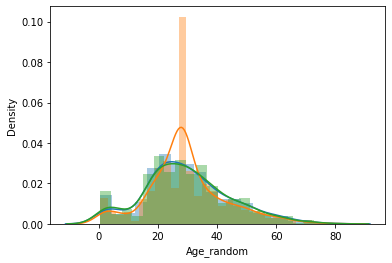

In [ ]:
import seaborn as sns
sns.distplot(df['Age'])
sns.distplot(df['Age_median'])
sns.distplot(df['Age_random'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


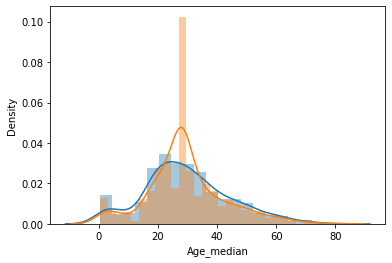

In [ ]:
sns.distplot(df['Age'])
sns.distplot(df['Age_median'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


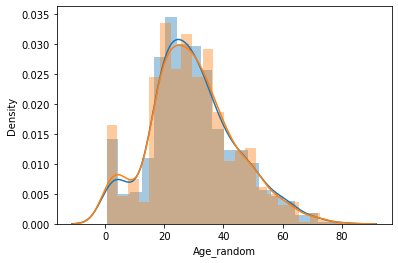

In [ ]:
sns.distplot(df['Age'])
sns.distplot(df['Age_random'])

Advantage:

Therefore, in case of random imputation we are getting exactly the same curve. Thus, less difference in the variance and correlation of data.

Disadvantage:

In every situation, randomness will not work. But we should give a try to it.



## Capturing nan values with a new feature.

when data is MNAR.

In [ ]:
df= pd.read_csv('train.csv', usecols=['Age', 'Survived', 'Fare'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
import numpy as np
df['Age_nan']=np.where(df['Age'].isna(),1,0)

#This is only.

In [ ]:
df.head()

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


Advantages:

1- Easy to implement.

2- Captures the importance of missing value.

Disadvantage:

1- Creation of extraa features.

## End Of Distribution Imputation.

In [26]:
df= pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

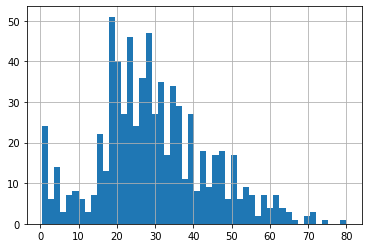

In [28]:
df.Age.hist(bins=50)

Take far end of the distribution and replace it.

In [29]:
df.Age.mean()

29.69911764705882

for Normal Distribution, data away from 3 sd will be far end data.

In [30]:
df.Age.mean()+3*df.Age.std()

73.27860964406095

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


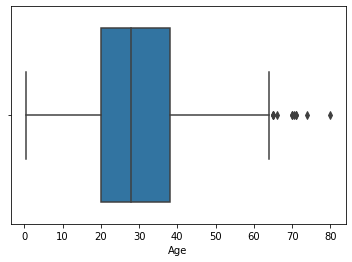

In [31]:
import seaborn as sns
sns.boxplot('Age', data=df)

In [32]:
def impute_nan(df, feature, median, extreme):
  df[feature+'_end']= df[feature].fillna(extreme)
  df[feature].fillna(median, inplace=True)


In our data set, we dont have left side outliers. SO, we did not take left side end value.

In [35]:
median=df.Age.median()

In [36]:
impute_nan(df, 'Age', median, df.Age.mean()+3*df.Age.std())

In [37]:
df.head()

,Survived,Age,Fare,Age_end
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


We will compare age replaced with median and extreme values.

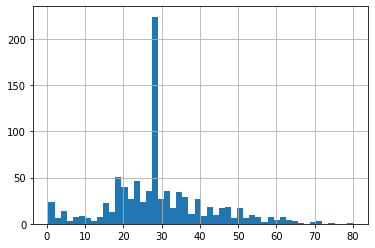

In [38]:
df.Age.hist(bins=50)

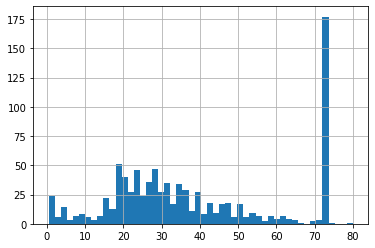

In [39]:
df.Age_end.hist(bins=50)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


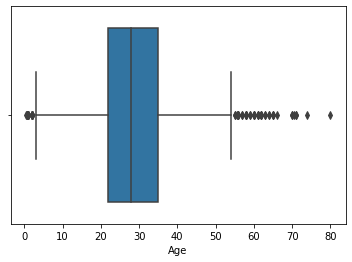

In [42]:
sns.boxplot('Age', data=df)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


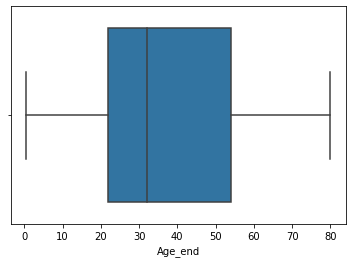

In [41]:
sns.boxplot('Age_end', data=df)

##### Now, in this case we have not only captures nan values but also dealt with the outliers.

In feature engineering, there are many ways and we need to try them out one by one depending on the problem.

Advantage:

It captures the missing information if any associated with the data.

Disadvantage:

Distorts the data.

